# Radar plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Read in player stats data downloaded in step 1

columns = ['Points_All', 'Points_Avg', 'Points_Net',
            'Serve_All', 'Serve_Points', 'Serve_SetAvg',
            'Reception_All', 'Reception_Pos%', 'Recept_Eff%', 
            'Attack_All', 'Attack_Points', 'Attack_Eff%',
            'Block_Points', 'Block_SetAvg',
            'Error_Serve', 'Error_Recept', 'Error_Atk', 'Error_All']

missing_values = {col: ["-"] for col in columns}

df = pd.read_csv('volley.ru.20240318.csv', na_values=missing_values)
df.head()

,No.,Player,Games/Sets,Points_All,Points_Avg,Points_Net,Serve_All,Serve_Points,Serve_SetAvg,Reception_All,...,Recept_Eff%,Attack_All,Attack_Points,Attack_Eff%,Block_Points,Block_SetAvg,Error_Serve,Error_Recept,Error_Atk,Error_All
0,1,Kovachevich Urosh,30-116,479.0,4.13,176,433.0,25.0,0.22,571.0,...,15%,833.0,419.0,50%,35.0,0.30,107.0,42.0,56.0,205
1,2,Murashko Roman,29-104,458.0,4.40,207,418.0,49.0,0.47,16.0,...,6%,753.0,381.0,51%,28.0,0.27,103.0,3.0,66.0,172
2,3,Al_hachdadi Mohamed,27-99,455.0,4.60,255,439.0,30.0,0.30,5.0,...,NaN,804.0,393.0,49%,32.0,0.32,86.0,2.0,63.0,151
3,4,Babkevich Vladislav,20-78,437.0,5.60,260,307.0,21.0,0.27,178.0,...,13%,730.0,388.0,53%,28.0,0.36,53.0,15.0,59.0,127
4,5,Pakshin Roman,30-113,425.0,3.76,168,429.0,48.0,0.42,617.0,...,22%,706.0,350.0,50%,27.0,0.24,99.0,37.0,58.0,194


In [3]:
df.describe()

,No.,Points_All,Points_Avg,Points_Net,Serve_All,Serve_Points,Serve_SetAvg,Reception_All,Attack_All,Attack_Points,Block_Points,Block_SetAvg,Error_Serve,Error_Recept,Error_Atk,Error_All
count,264.000000,218.000000,264.000000,264.000000,230.000000,192.000000,264.00000,224.000000,217.000000,209.000000,194.000000,194.000000,215.000000,184.000000,189.000000,264.000000
mean,132.500000,129.802752,1.516136,39.193182,174.439130,12.442708,0.13303,144.433036,207.751152,103.239234,22.324742,0.307165,36.120930,12.983696,18.322751,51.583333
std,76.354437,116.486516,1.289770,59.580956,127.161086,11.129267,0.14586,187.711603,205.659537,99.176175,17.303529,0.178566,27.471553,13.596639,18.104500,48.394692
min,1.000000,1.000000,0.000000,-45.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,0.000000
25%,66.750000,34.250000,0.367500,-2.000000,62.250000,3.000000,0.00000,9.000000,38.000000,21.000000,9.000000,0.170000,12.000000,2.000000,4.000000,11.000000
50%,132.500000,99.500000,1.400000,15.500000,175.500000,10.000000,0.10000,27.000000,147.000000,77.000000,18.000000,0.270000,31.000000,8.000000,12.000000,35.000000
75%,198.250000,197.750000,2.422500,71.000000,261.750000,18.000000,0.20250,257.500000,320.000000,160.000000,31.750000,0.407500,56.000000,21.250000,28.000000,83.000000
max,264.000000,479.000000,5.600000,260.000000,463.000000,54.000000,1.00000,740.000000,833.000000,419.000000,75.000000,0.780000,112.000000,62.000000,70.000000,205.000000


In [4]:
# Filter only outsider hitter
df_OH = df[ (df['Reception_All'] >= 50) & (df['Points_All'] >= 50)]
df_OH.shape


(60, 21)

In [5]:
df_OH.head(10)

,No.,Player,Games/Sets,Points_All,Points_Avg,Points_Net,Serve_All,Serve_Points,Serve_SetAvg,Reception_All,...,Recept_Eff%,Attack_All,Attack_Points,Attack_Eff%,Block_Points,Block_SetAvg,Error_Serve,Error_Recept,Error_Atk,Error_All
0,1,Kovachevich Urosh,30-116,479.0,4.13,176,433.0,25.0,0.22,571.0,...,15%,833.0,419.0,50%,35.0,0.30,107.0,42.0,56.0,205
3,4,Babkevich Vladislav,20-78,437.0,5.60,260,307.0,21.0,0.27,178.0,...,13%,730.0,388.0,53%,28.0,0.36,53.0,15.0,59.0,127
4,5,Pakshin Roman,30-113,425.0,3.76,168,429.0,48.0,0.42,617.0,...,22%,706.0,350.0,50%,27.0,0.24,99.0,37.0,58.0,194
6,7,Dinekin Stanislav,30-113,405.0,3.58,194,443.0,31.0,0.27,571.0,...,16%,687.0,353.0,51%,21.0,0.19,56.0,37.0,49.0,142
8,9,Ebadipur Milad,30-119,383.0,3.22,100,428.0,23.0,0.19,740.0,...,19%,718.0,329.0,46%,31.0,0.26,89.0,48.0,67.0,204
11,12,Voronkov Fedor,29-108,370.0,3.43,141,415.0,39.0,0.36,557.0,...,18%,642.0,301.0,47%,30.0,0.28,80.0,37.0,43.0,160
12,13,Marchenko Andrey,30-107,358.0,3.35,185,418.0,22.0,0.21,503.0,...,20%,603.0,290.0,48%,46.0,0.43,64.0,18.0,46.0,128
13,14,Tetyukhin Pavel,29-109,352.0,3.23,159,388.0,33.0,0.30,408.0,...,19%,587.0,286.0,49%,33.0,0.30,65.0,21.0,58.0,144
15,16,Zhang Jinin,26-96,332.0,3.46,110,372.0,21.0,0.22,606.0,...,11%,526.0,269.0,51%,42.0,0.44,81.0,48.0,39.0,168
17,18,Biryukov Denis,26-87,326.0,3.75,136,294.0,22.0,0.25,489.0,...,12%,598.0,254.0,42%,50.0,0.57,67.0,37.0,45.0,149


In [6]:
# Calculate rankings for each statistic (excluding 'Player' column)
df_rankings = df_OH.drop(['No.', 'Player', 'Games/Sets'], axis=1).rank(method='min', ascending=False)

# Add player back 
df_rankings.insert(0, 'Player', df_OH['Player'])

# Select rankings for player #16
df_rankings.head(10)

,Player,Points_All,Points_Avg,Points_Net,Serve_All,Serve_Points,Serve_SetAvg,Reception_All,Reception_Pos%,Recept_Eff%,Attack_All,Attack_Points,Attack_Eff%,Block_Points,Block_SetAvg,Error_Serve,Error_Recept,Error_Atk,Error_All
0,Kovachevich Urosh,1.0,2.0,4.0,2.0,9.0,22.0,5.0,21.0,43.0,1.0,1.0,10.0,5.0,17.0,1.0,7.0,6.0,1.0
3,Babkevich Vladislav,2.0,1.0,1.0,10.0,13.0,12.0,51.0,41.0,51.0,2.0,2.0,5.0,14.0,9.0,23.0,50.0,3.0,16.0
4,Pakshin Roman,3.0,3.0,5.0,3.0,1.0,3.0,2.0,3.0,4.0,4.0,4.0,10.0,17.0,30.0,2.0,9.0,4.0,3.0
6,Dinekin Stanislav,4.0,7.0,2.0,1.0,7.0,12.0,5.0,27.0,36.0,5.0,3.0,7.0,25.0,43.0,19.0,9.0,9.0,12.0
8,Ebadipur Milad,5.0,16.0,13.0,4.0,10.0,28.0,1.0,21.0,16.0,3.0,5.0,26.0,11.0,27.0,3.0,3.0,1.0,2.0
11,Voronkov Fedor,6.0,11.0,7.0,6.0,2.0,5.0,7.0,6.0,22.0,6.0,6.0,23.0,12.0,22.0,6.0,9.0,14.0,7.0
12,Marchenko Andrey,7.0,13.0,3.0,5.0,11.0,26.0,11.0,17.0,10.0,7.0,7.0,19.0,2.0,6.0,14.0,42.0,10.0,15.0
13,Tetyukhin Pavel,8.0,15.0,6.0,7.0,5.0,7.0,23.0,9.0,16.0,9.0,8.0,18.0,9.0,17.0,12.0,35.0,4.0,11.0
15,Zhang Jinin,9.0,9.0,11.0,8.0,13.0,22.0,3.0,56.0,59.0,11.0,9.0,7.0,3.0,4.0,5.0,3.0,17.0,4.0
17,Biryukov Denis,10.0,4.0,8.0,12.0,11.0,16.0,14.0,56.0,56.0,8.0,10.0,44.0,1.0,2.0,10.0,9.0,11.0,10.0


In [7]:
df_rankings.to_csv('rankings_OH.csv', index=False)

In [8]:
df_rankings_sel = df_rankings[[col for col in df_rankings.columns if not col.startswith('Error_')]]

# Normalize the data (Min-Max scaling)
df_normalized = df_rankings_sel.drop('Player', axis=1)
df_normalized = (df_normalized.max()- df_normalized) / (df_normalized.max() - df_normalized.min())

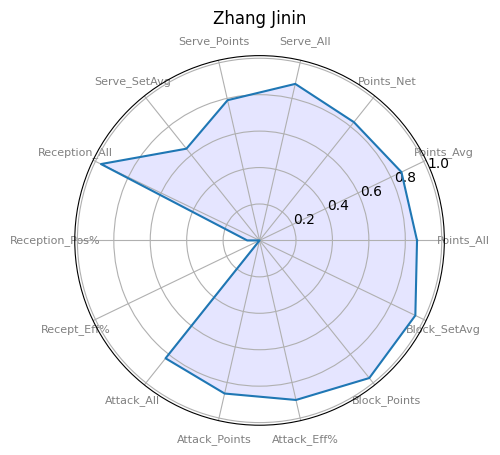

In [9]:
# Plot spider chart for each player
num_players = len(df_normalized)
num_stats = len(df_normalized.columns)  # Exclude the 'Player' column
stats = df_normalized.columns.tolist()

for i in [8]:
    player_name = df_rankings_sel['Player'].iloc[i]
    values = df_normalized.iloc[i].values.tolist()
    values += values[:1]  # Close the polygon
    angles = [n / float(num_stats) * 2 * 3.141592653589793 for n in range(num_stats)]
    angles += angles[:1]  # Close the polygon

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], stats, color='grey', size=8)
    ax.plot(angles, values)
    ax.fill(angles, values, 'blue', alpha=0.1)

    ax.set_title(player_name, va='bottom')

plt.show()



In [65]:
'''
# Create radar charts for each player
for index, row in df_normalized.iterrows():
    player_name = df_rankings['Player'].iloc[index]
    player_data = row.tolist()
    stat_names = row.index.tolist()
    
    # Create a DataFrame for the player's data
    player_df = pd.DataFrame({'Variable': stat_names, 'Value': player_data})
    
    # Create radar chart for the player
    fig = px.line_polar(player_df, r='Value', theta='Variable', 
                        line_close=True, 
                        title=player_name)
    fig.update_traces(fill='toself')
    fig.show()
'''

"\n# Create radar charts for each player\nfor index, row in df_normalized.iterrows():\n    player_name = df_rankings['Player'].iloc[index]\n    player_data = row.tolist()\n    stat_names = row.index.tolist()\n    \n    # Create a DataFrame for the player's data\n    player_df = pd.DataFrame({'Variable': stat_names, 'Value': player_data})\n    \n    # Create radar chart for the player\n    fig = px.line_polar(player_df, r='Value', theta='Variable', \n                        line_close=True, \n                        title=player_name)\n    fig.update_traces(fill='toself')\n    fig.show()\n"

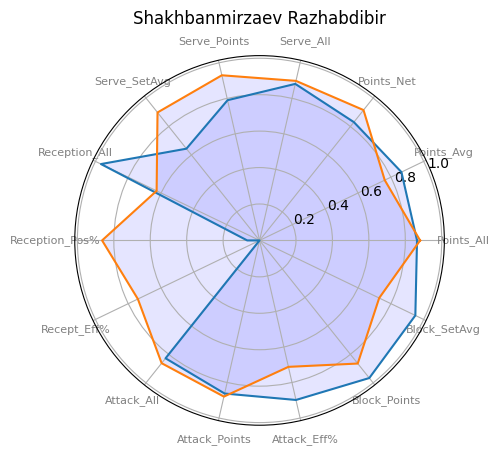

In [10]:
for i in [8, 7]:
    player_name = df['Player'].iloc[i]
    values = df_normalized.iloc[i].values.tolist()
    values += values[:1]  # Close the polygon
    angles = [n / float(num_stats) * 2 * 3.141592653589793 for n in range(num_stats)]
    angles += angles[:1]  # Close the polygon

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], stats, color='grey', size=8)
    ax.plot(angles, values)
    ax.fill(angles, values, 'blue', alpha=0.1)

    ax.set_title(player_name, va='bottom')

plt.show()

In [13]:
import plotly.graph_objects as go
import os


# Create a directory to save the figures if it doesn't exist
output_directory = "player_figures"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

'''
# Example DataFrame (replace this with your actual data)
data = {
    'Player': ['Player1', 'Player2'],
    'Stat1': [4, 3],
    'Stat2': [3, 4],
    'Stat3': [2, 5],
    'Stat4': [5, 2],
    'Stat5': [4, 3]
}
df = pd.DataFrame(data)
'''

df = df_normalized
players = df_rankings_sel['Player'].tolist()


# Create lists of stat names and values for each player
stat_names = df.columns.tolist()
stat_names_CN = ['总得分',
                 '局均得分',
                 '净得分',
                 '发球总数',
                 '发球得分',
                 '局均发球得分',
                 '一传总数',
                 '一传到位率',
                 '完美到位率',
                 '扣球总数',
                 '扣球得分',
                 '扣球效率',
                 '拦网得分',
                 '局均拦网得分'
] 

# Get the stats of the first player
zhang_stats = df.iloc[8, :].values.tolist()

# Create pair-wise radar charts for each player
for i, player in enumerate(players):
    if i == 8:
        # Skip Zhang as we're using their stats as reference
        continue
    if i >= 10:
        # Only compare Zhang with top 10 players
        continue 
    
    player_stats = df.iloc[i, :].values.tolist()
    
    # Create radar chart for pair-wise comparison
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=player_stats,
        theta=stat_names_CN,
        # mode='lines',
        fill='toself',
        name=f'{player}',
        line=dict(color='blue'),
        opacity=0.5
    ))

    fig.add_trace(go.Scatterpolar(
        r=zhang_stats,
        theta=stat_names_CN,
        # mode='lines',
        fill='toself',
        name='张景胤'
    ))

    # Update layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=False),
            angularaxis=dict(direction="clockwise") 
        ),
        showlegend=True,
        title=""
    )
    
    # Save the figure as a JPG file with the player's name as the file name
    output_file_path = os.path.join(output_directory, f"{i:02}_{player}_radar_chart.jpg")
    fig.write_image(output_file_path)
    
    # Show the plot
    fig.show()